# More Support Vector Machines

## 1. The data

In this lab, we'll look at one more visual data sets and at the end of this lab, we'll apply SVMs to the salaries data set we used in our decision trees labs. We'll be exploring more complex kernels, so let's look at data that is more noisu, to make the problems slightly more challenging. Also, we'll look a data set with 4 classes instead of three and see how `LinearSVM` is different from `SVM` with kernel = linear.

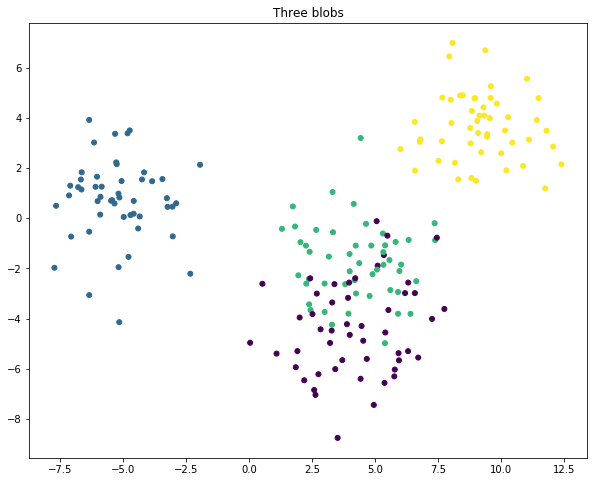

In [70]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import svm
from sklearn.cross_validation import train_test_split

import numpy as np

plt.figure(figsize=(10, 8))
plt.title("Three blobs")
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25)
plt.show()

## 2. Try other kernel functions

### 2.1 Polynomial kernels

Let's try a polynomial kernel with the standard degree level. Recall that this is equal to 3. 

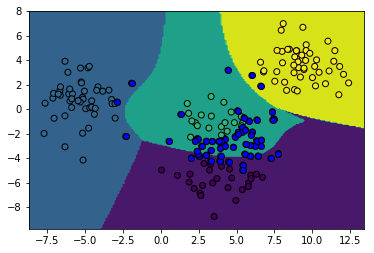

In [15]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)

clf = svm.SVC(kernel = 'poly', C = 10) 
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 
plt.show()

Now let's get the degree level up to 3. The result looks more complex, but is this necessary? 

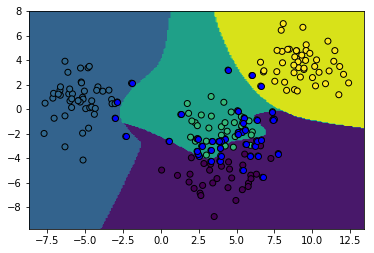

In [17]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)

clf = svm.SVC(kernel = 'poly', C = 10, degree = 5) 
clf.fit(X, y)

X1= X[:,0]
X2= X[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y, edgecolors = 'k')
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 
plt.show()

### 2.2 Training and test sets

To know the answer, we should actually split our data up in a training and test set, and evaluate the results. Let's create a training set of 0.67 and a test set of size 0.33. 

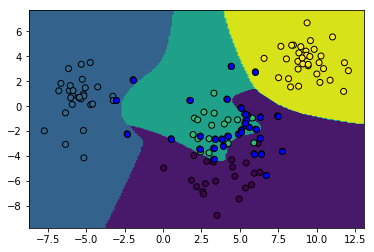

In [39]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=123)

clf = svm.SVC(kernel = 'poly', C = 10, degree = 5, probability = True) 
clf.fit(X_train, y_train)

X1= X_train[:,0]
X2= X_train[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y_train, edgecolors = 'k')
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue', edgecolors= 'k') 
plt.show()

In [40]:
clf.score(X_test, y_test)

0.8484848484848485

Seems we have an accuracy of around 85%. The drawn plot plots the decision boundaries along with the training set cases. Let's draw the decision boundaries along with the test set cases to get a visual sense of everything.

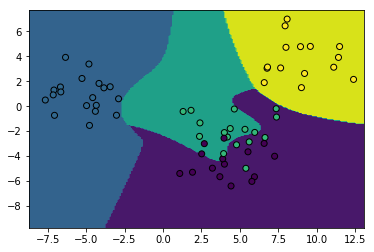

In [41]:
axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k')
plt.show()

Now, let's repeat all this and see what our accuracy is when we use a lower degree polynomial model.

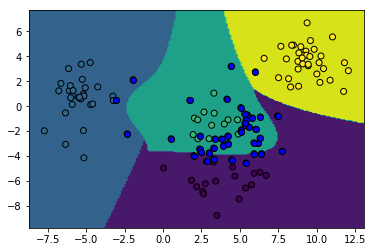

In [42]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=123)

clf = svm.SVC(kernel = 'poly', C = 10, probability = True) 
clf.fit(X_train, y_train)

X1= X_train[:,0]
X2= X_train[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y_train, edgecolors = 'k')
plt.show()

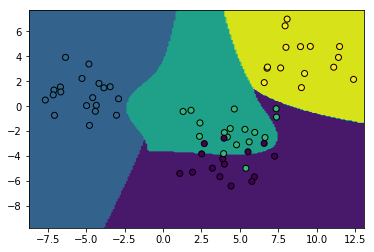

In [43]:
axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k')
plt.show()

In [33]:
clf.score(X_test, y_test)

0.8939393939393939

### 2.3 Sigmoid kernel

#### 2.3.1 default gamma

Let's try the same thing using a sigmoid kernel. As mentioned in the lecture, the results can depend heavily on the choice of gamma. We didn't specify gamma before, but using the sigmoid kernel will show you how an inappropriate choice of gamma can ruin your results. Let's use the same model as before, but set `kernel` = `sigmoid`, and 

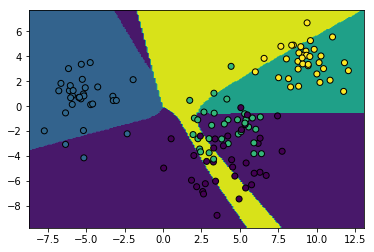

In [57]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=123)

clf = svm.SVC(kernel = 'sigmoid', C = 10, probability = True) 
clf.fit(X_train, y_train)

X1= X_train[:,0]
X2= X_train[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y_train, edgecolors = 'k')
plt.show()

This result seems really off. Testing it on your test set, this result can be confirmed.

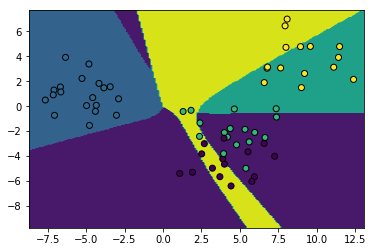

In [60]:
axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k')
plt.show()

In [61]:
clf.score(X_test, y_test)

0.5

#### 2.3.2 gamma = 0.001

Let's make gamma a lot smaller and see what happens!

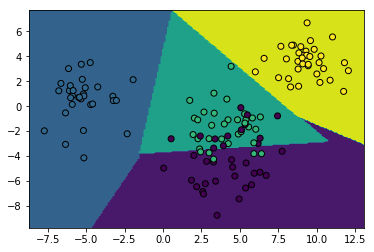

In [95]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=123)

clf = svm.SVC(kernel = 'sigmoid', C = 10, gamma= 0.001, probability = True) 
clf.fit(X_train, y_train)

X1= X_train[:,0]
X2= X_train[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y_train, edgecolors = 'k')
plt.show()

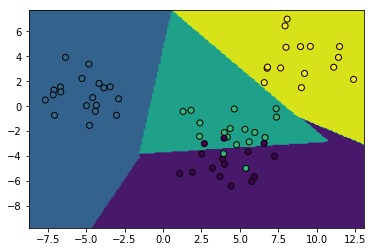

In [96]:
axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k')
plt.show()

In [97]:
clf.score(X_test, y_test)

0.9242424242424242

Just making gamma smaller leads to a pretty good result in this case!

## 3. Use NuSVC and LinearSVC

Let's build a linear SVM model using NuSVC. Set `nu` equal to 0.6.

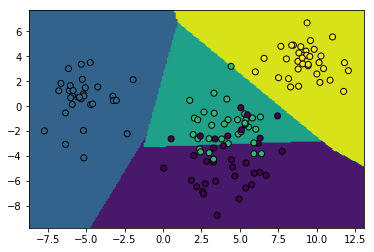

In [93]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=123)

clf = svm.NuSVC(kernel = "linear", probability = True, nu = 0.6) 
clf.fit(X_train, y_train)

X1= X_train[:,0]
X2= X_train[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y_train, edgecolors = 'k')
plt.show()

Let's look at a simple linear kernel model on this data set. As you can see below, the result doesn't seem very different. It has been shown that SVM and nuSVM are essentially the same thing, except that for nuSVM, C is reparametrized into nu. The advantage of this is that where C has no bounds and can be any positive number, nu always lies between 0 and 1. 

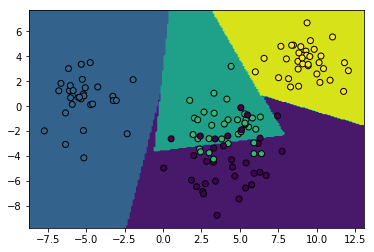

In [99]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=123)

clf = svm.SVC(kernel = "linear", probability = True) 
clf.fit(X_train, y_train)

X1= X_train[:,0]
X2= X_train[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y_train, edgecolors = 'k')
plt.show()

Now, let's have a look at the coefficients of the decision boundaries. Remember that a simple `SVC` uses a one-vs-one method. this means that for 4 classes, $\dfrac{(4 * 3)}{2}= 6$ decision boundaries are created. The coefficients can be accessed in the attribute `.coef_`.

In [100]:
clf.coef_

array([[ 0.67960661, -0.14028662],
       [ 0.10412119, -0.67471506],
       [-0.27783575, -0.76024359],
       [-0.52169114,  0.04624738],
       [-0.24987366, -0.01968511],
       [-1.12263245, -0.52598875]])

Let's repeat the same thing but using LinearSVC. Access the `.coef.` attribute again and record what happens. 

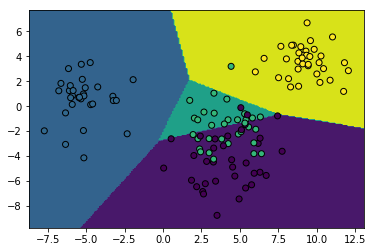

In [102]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=123)

clf = svm.LinearSVC() 
clf.fit(X_train, y_train)

X1= X_train[:,0]
X2= X_train[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 200)
x2_coord = np.linspace(X2_min, X2_max, 200)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)

x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

Z = clf.predict(x1x2).reshape(X1_C.shape)

axes = plt.gca()
axes.contourf(X1_C, X2_C, Z, alpha = 1)
plt.scatter(X1, X2, c = y_train, edgecolors = 'k')
plt.show()

In [103]:
clf.coef_

array([[ 0.08341273, -0.30440575],
       [-0.59522768,  0.19552887],
       [ 0.01581777, -0.0540104 ],
       [ 0.22105323,  0.3750627 ]])

## 4. A higher-dimensional, real world data set

Until now, we've only considered data sets with 2 features to make it easy to understand what's going on visually. Remember that you can use Support Vector Machines on a wide range of classification data sets, with more than 2 features. It will no longer be possible to visually represent decision boundaries (at least, if you have more than 3 feature spaces), but you'll still be able to make predictions.

In [17]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
salaries = pd.read_csv("salaries_final.csv", index_col = 0)

In [21]:
from patsy import dmatrices
target, data = dmatrices('Target ~ Age + C(Education) + \
                  C(Occupation) + C(Relationship) + C(Race) + C(Sex)',
                  salaries, return_type = "dataframe")

In [21]:
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                   test_size = 0.25, random_state=123)

In [22]:
import time
start_time = time.time()
clf = svm.SVC(probability=True)
clf.fit(data_train, target_train.iloc[:,1])
total =(time.time() - start_time)

In [27]:
total/60

4.6848699649175005

In [24]:
clf.predict_proba(data_test)

array([[0.17860264, 0.82139736],
       [0.70338905, 0.29661095],
       [0.93159361, 0.06840639],
       ...,
       [0.91973572, 0.08026428],
       [0.85480836, 0.14519164],
       [0.75951652, 0.24048348]])

In [25]:
clf.score(data_test, target_test.iloc[:,1])

0.8304876550792286

Note that it takes quite a while to compute this. The score is slightly better than the best result obtained using decision trees, but do note that SVMs are computationally expensive. Changing kernels can even make computation times much longer.

# Sources

https://stackoverflow.com/questions/11230955/what-is-the-meaning-of-the-nu-parameter-in-scikit-learns-svm-class